# Ordinary Least Squares Linear Regression
Linear regression is a statistical method that allows us to summarize and study relationships between two continuous quantitative (measurable) variables. A regression model attempts to predict the value of one variable, known as the dependent variable, response variable, or label, using the values of other variables, known as independent variables, explanatory variables, or features. 

Simple regression has one label used to predict one feature. Multiple regression uses two of more feature variables. 

We're learing linear regression today because it's: 
- Very widely used
- Quick to implement and run
- Easy to interpret
- The basis for many other models

## Linear model of a straight line

Let's have a look at the simplest case of a regression model for a straight line. If we have one feature and one label, and there are some number of values pairs, ${x_i,y_i}$, we can define a line that best fits that data.  

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

$$where\\
slope (m) = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y = b\ at\ x = 0$$




If we have a number of values pairs, ${x_i,y_i}$, we can write the equation for the line with the errors as:

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = error$$

We can visualize these errors as shown in the figure below.

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/LSRegression.jpg" alt="LS Regression" style="width: 450px;"/>
<center>**Example of Ordinary Least Squares Regression**</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least squares regression**.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

## Ordinary Least Squares Regression
OLS is one of the simplest models to implement because rather than having to search for values by trial and error or calculate them analytically using more advanced linear algebra, we can estimate them directly from our data. 

Let's create a dataset so that we can walk through the examples: 

Text(0, 0.5, 'dependent variable')

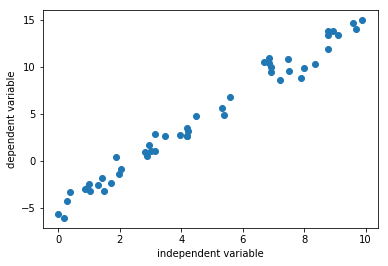

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)

df = pd.DataFrame({"x":(10 * rng.rand(50)),
                   "y":(2 * x - 5 + rng.randn(50))},
                 columns=["x", "y"])

plt.scatter(df.x, df.y)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")

We can see from our dataplot that there is a linear relationship here, so let's walk through a simple linear regression using python. 

As always, don't worry. I'm going to walk you through the logic step by step, but then I'll show you how to easily implement it with sci-kit learn. 

## Creating a line of best fit
The goal of any statistical model is to minimize error. For linear regression, this means finding the line we can draw through the data that gives us back the smallest sum of squared erorrs. 

Remember that the equation we are solving for using our data points is: 
`y = B0 + B1 * x`

Where: 
- Y is the output value we want to predict
- B0 is called the intercept because it determines where the line intercepts the y-axis
- B1 s called the slope because it defines the slope of the line or how x translates into a y value before we add our bias
- The goal is to find the best estimates for the coefficients to minimize the errors in predicting y from x

### 1. Calculating Slope (B1)
We can use the following equation to estimate slope from a dataset:   

`B1 = corr(x, y) * stdev(y) / stdev(x)`

We'll start by getting the correlation coefficient (R^2) between x and y: 

In [178]:
r_sq = df.corr() 
r_sq

,x,y
x,1.000000,0.989485
y,0.989485,1.000000


Now we can multiply 0.989485 times the standard deviation of y divided by the standard deviation of x: 

In [179]:
B1 = 0.989485 * (np.std(df.y)/np.std(df.x))

In [180]:
B1

2.027209332424569

### 3. Calculating the Intercept
This part is easy since we already know the rest of the equation:   
    `B0 = mean(y) – B1 * mean(x)`

In [181]:
B0 = df.y.mean() - (B1 * df.x.mean())
B0

-4.998579523464112

### 4. Plotting the line of best fit
Now that we have an equation for our line, we can use it to draw a line of best fit through the data points:   
`y = B0 + (B1 * x)` 

We can calculate the predictions for every point in our dataset: 

In [182]:
df["y_line"] = B0 + (B1 * df.x)

In [183]:
df.head()

,x,y,y_line
0,4.170220,2.653267,3.455329
1,7.203245,8.561284,9.603906
2,0.001144,-5.668959,-4.996261
3,3.023326,1.033987,1.130335
4,1.467559,-3.182193,-2.023530


And we can use that information to plot the regression line: 

Text(0.5, 0, 'Independent Variable')

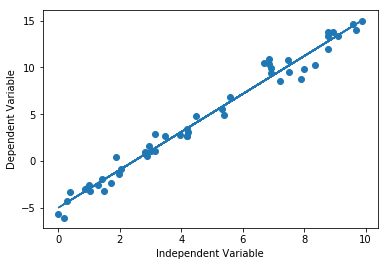

In [184]:
plt.scatter(df.x,df.y) # create the main scatter plot
plt.plot(df.x, df.y_line) # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

## Assumptions of Linear Regression
Linear regression is a parametric model, which means that we make some assumptions about our dataset that must be roughly fulfilled in order for us to use this model. 

The Linear Regression model assumes: 

- There is a **linear relationship** between the dependent variable and the **coefficients** of the independent variables.
- Measured error is independent and random. Technically, we say that the error is **independently and identically distributed, or iid**.
- There is no ignificant correlation between the independent variables (multicolinearity).
- Residuals (errors) are **homoscedastic** (having constant variance).  In other words, the errors are the same across all groups of independent variables. The opposite of homoscedastic is **heteroscedastic**, where there is systematic variation in the residuals with label values.
